<a href="https://colab.research.google.com/github/ecesic/DS-Task/blob/main/hr_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import dataset**

In [102]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "aug_train.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arashnic/hr-analytics-job-change-of-data-scientists",
  file_path
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'hr-analytics-job-change-of-data-scientists' dataset.
First 5 records:    enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN 

# **Import Missing Libraries**

In [1]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [85]:
import seaborn as sns

In [2]:
from scipy.stats import chi2_contingency

In [ ]:
!pip install lightgbm

In [4]:
!pip install verstack

# R - Install

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects import globalenv

In [ ]:
base = importr("base")

utils = importr("utils")

utils.chooseCRANmirror(ind=1)

pandas2ri.activate()

%load_ext rpy2.ipython

globalenv["r_df"] = df

/usr/local/lib/python3.12/dist-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "company_size". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/usr/local/lib/python3.12/dist-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "company_type". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


In [ ]:
utils.install_packages("remotes")
%R remotes::install_github("njtierney/naniar")

(as ‘lib’ is unspecified)







	‘/tmp/RtmplLBfme/downloaded_packages’



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                          
2: CRAN packages only           
3: None                         
4: vroom (1.6.6 -> 1.6.7) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 1
vroom     (1.6.6 -> 1.6.7   ) [CRAN]
plyr      (NA    -> 1.8.9   ) [CRAN]
gridExtra (NA    -> 2.3     ) [CRAN]
UpSetR    (NA    -> 1.4.0   ) [CRAN]
viridis   (NA    -> 0.6.5   ) [CRAN]
visdat    (NA    -> 0.6.0   ) [CRAN]
norm      (NA    -> 1.0-11.1) [CRAN]
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmplLBfme/remotese3266a31ce/njtierney-naniar-89f2a5d/DESCRIPTION’ ... OK
* preparing ‘naniar’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘naniar_1.1.0.9000.tar.gz’



Installing 7 packages: vroom, plyr, gridExtra, UpSetR, viridis, visdat, norm
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/vroom_1.6.7.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.9.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/gridExtra_2.3.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/UpSetR_1.4.0.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/viridis_0.6.5.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/visdat_0.6.0.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/norm_1.0-11.1.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmplLBfme/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [ ]:
%R library(naniar)

array(['naniar', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

# **Visualizing Missing Data**

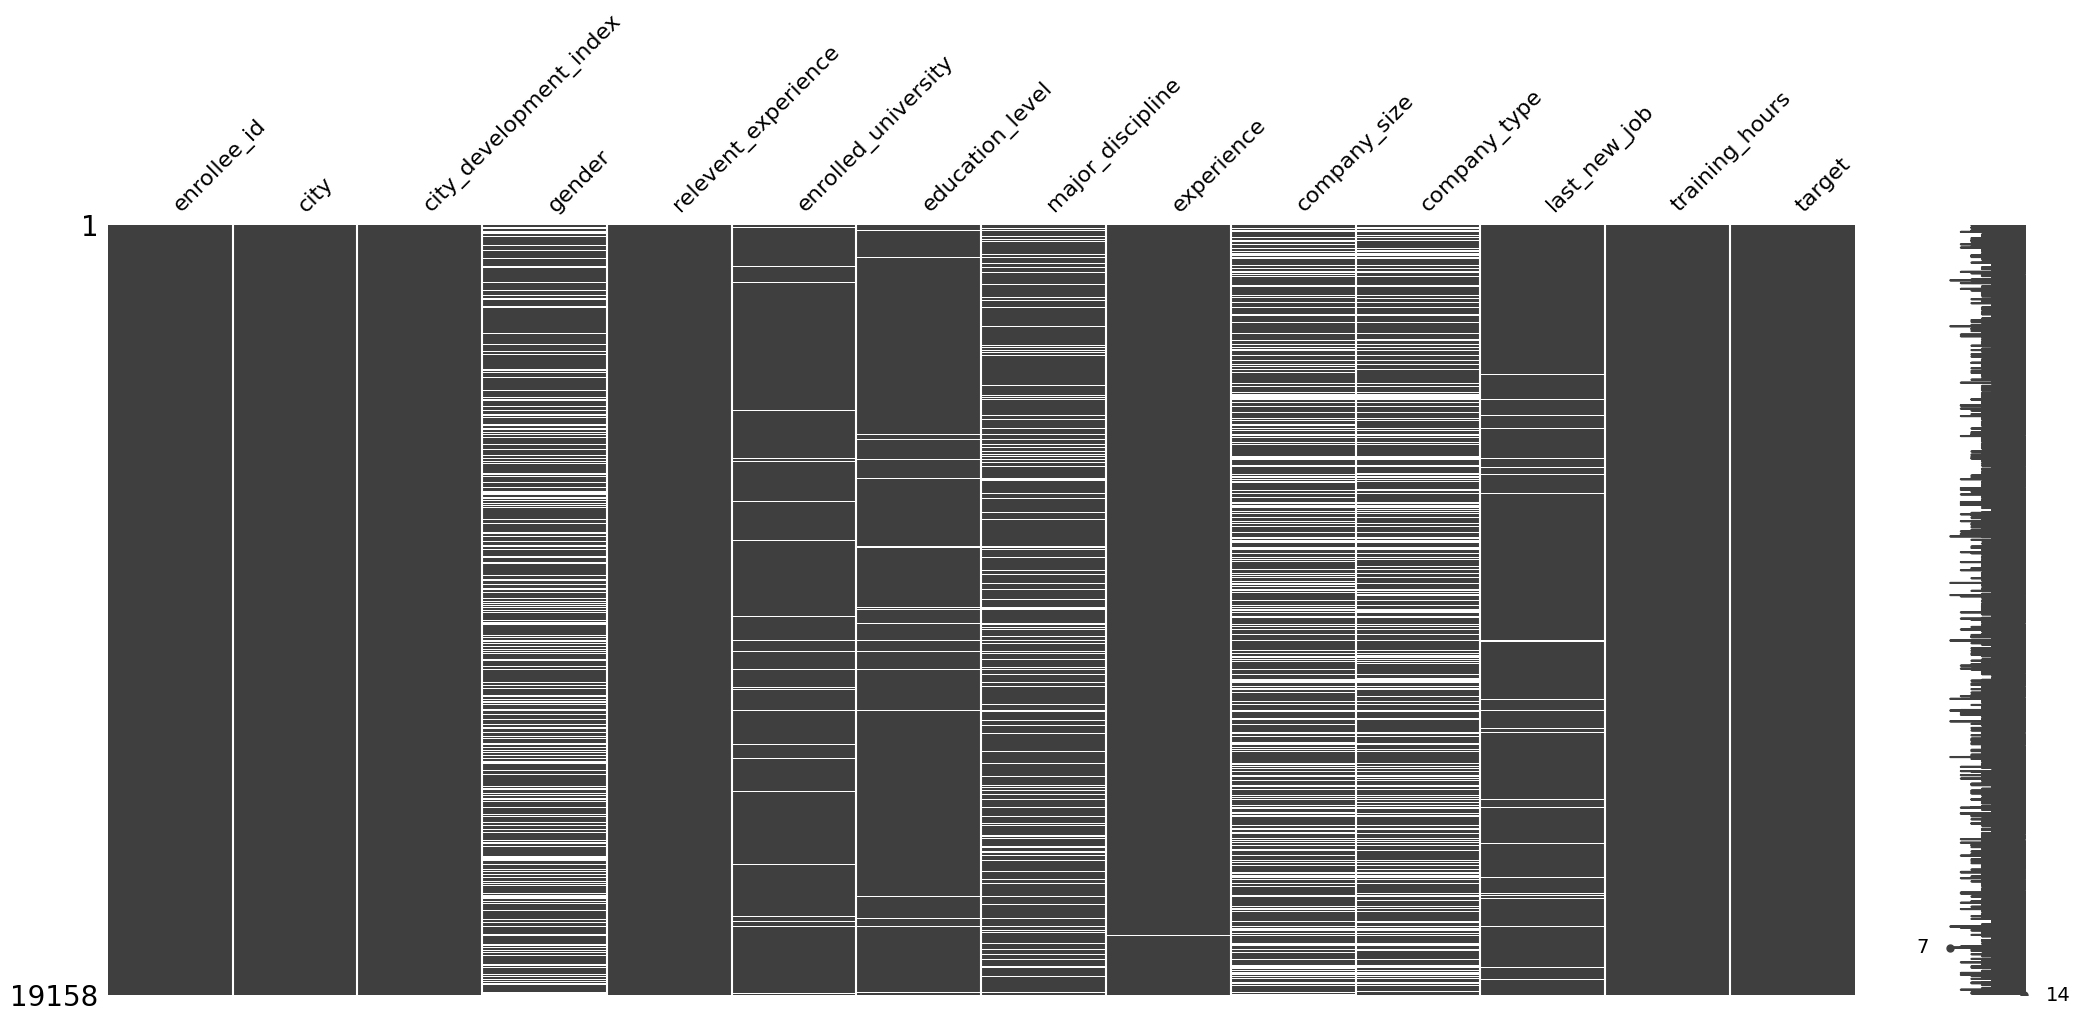

<Figure size 800x600 with 0 Axes>

In [ ]:
msno.matrix(df)
plt.figure(figsize = (8,6))
plt.show()

<Axes: >

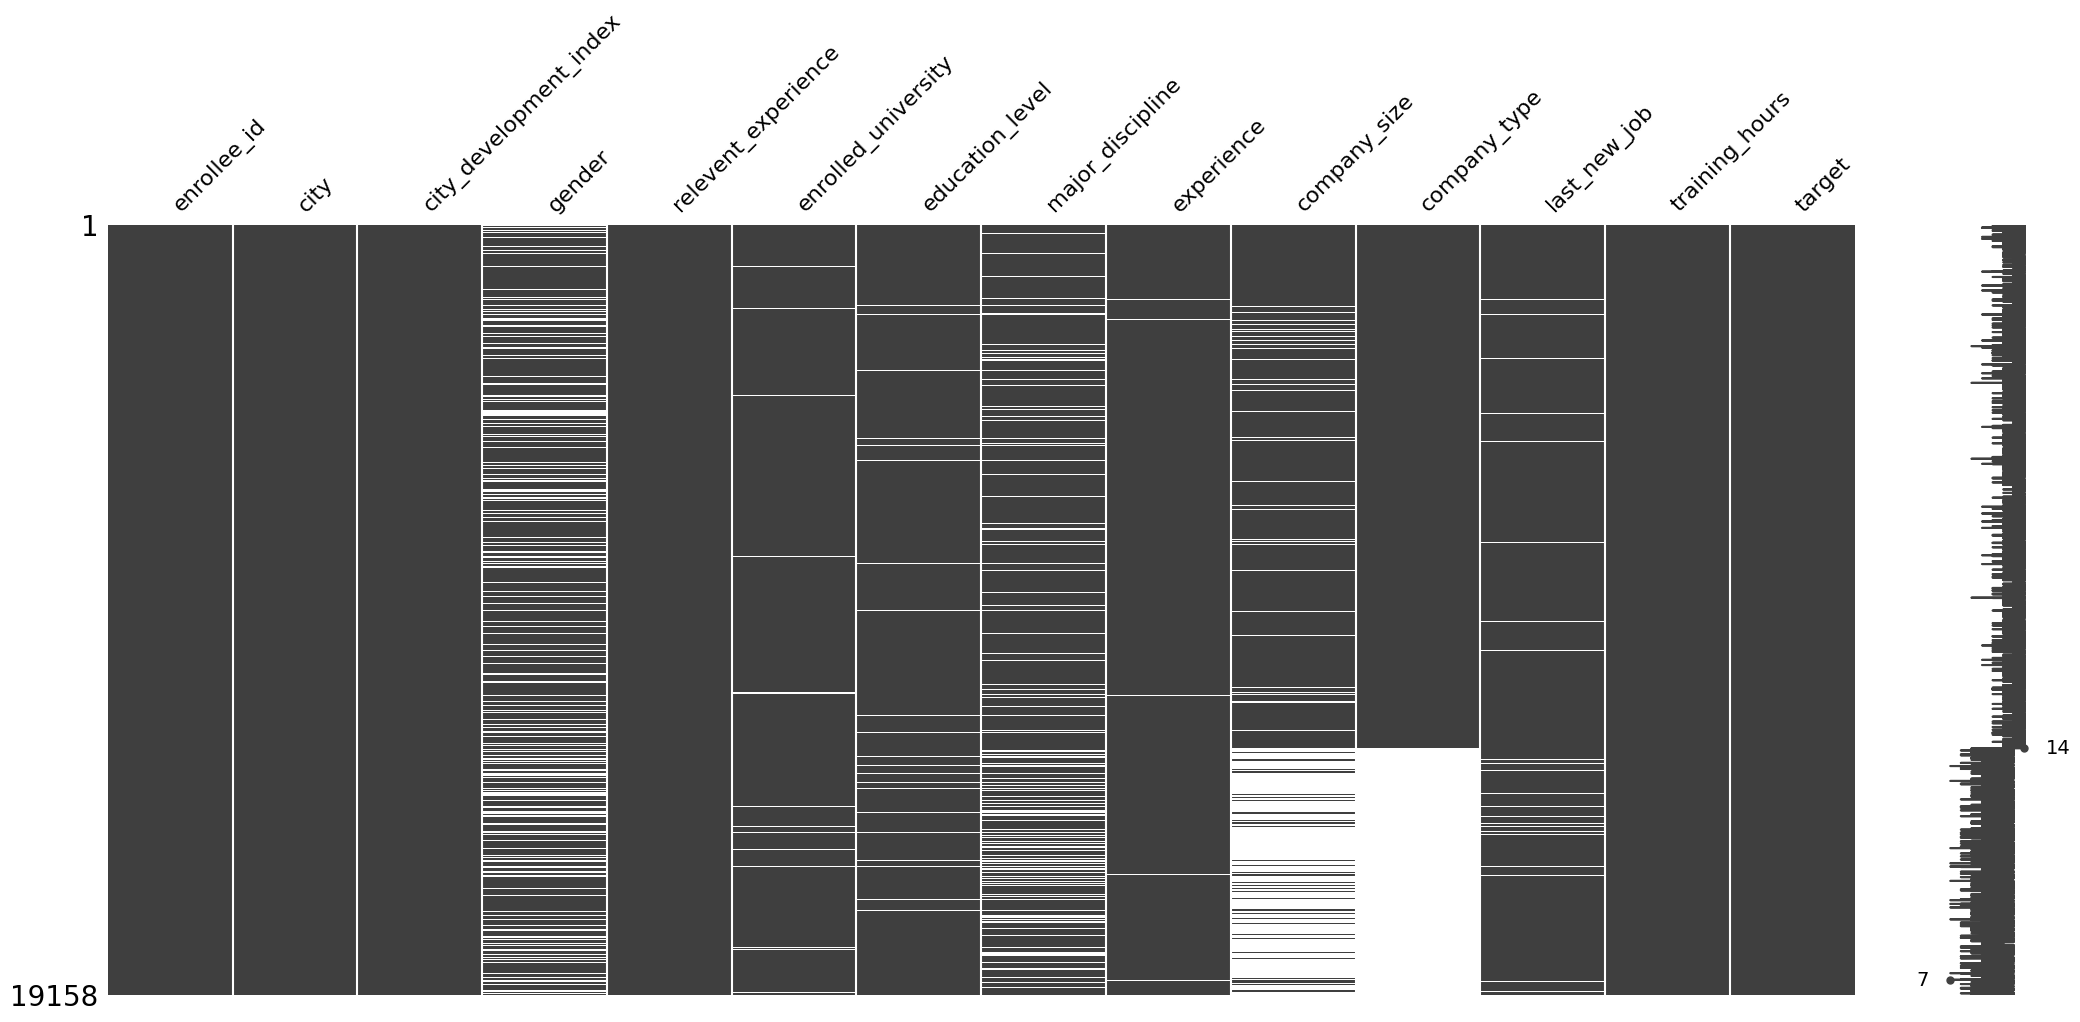

In [ ]:
sorted = df.sort_values('company_type')
msno.matrix(sorted)

<Axes: >

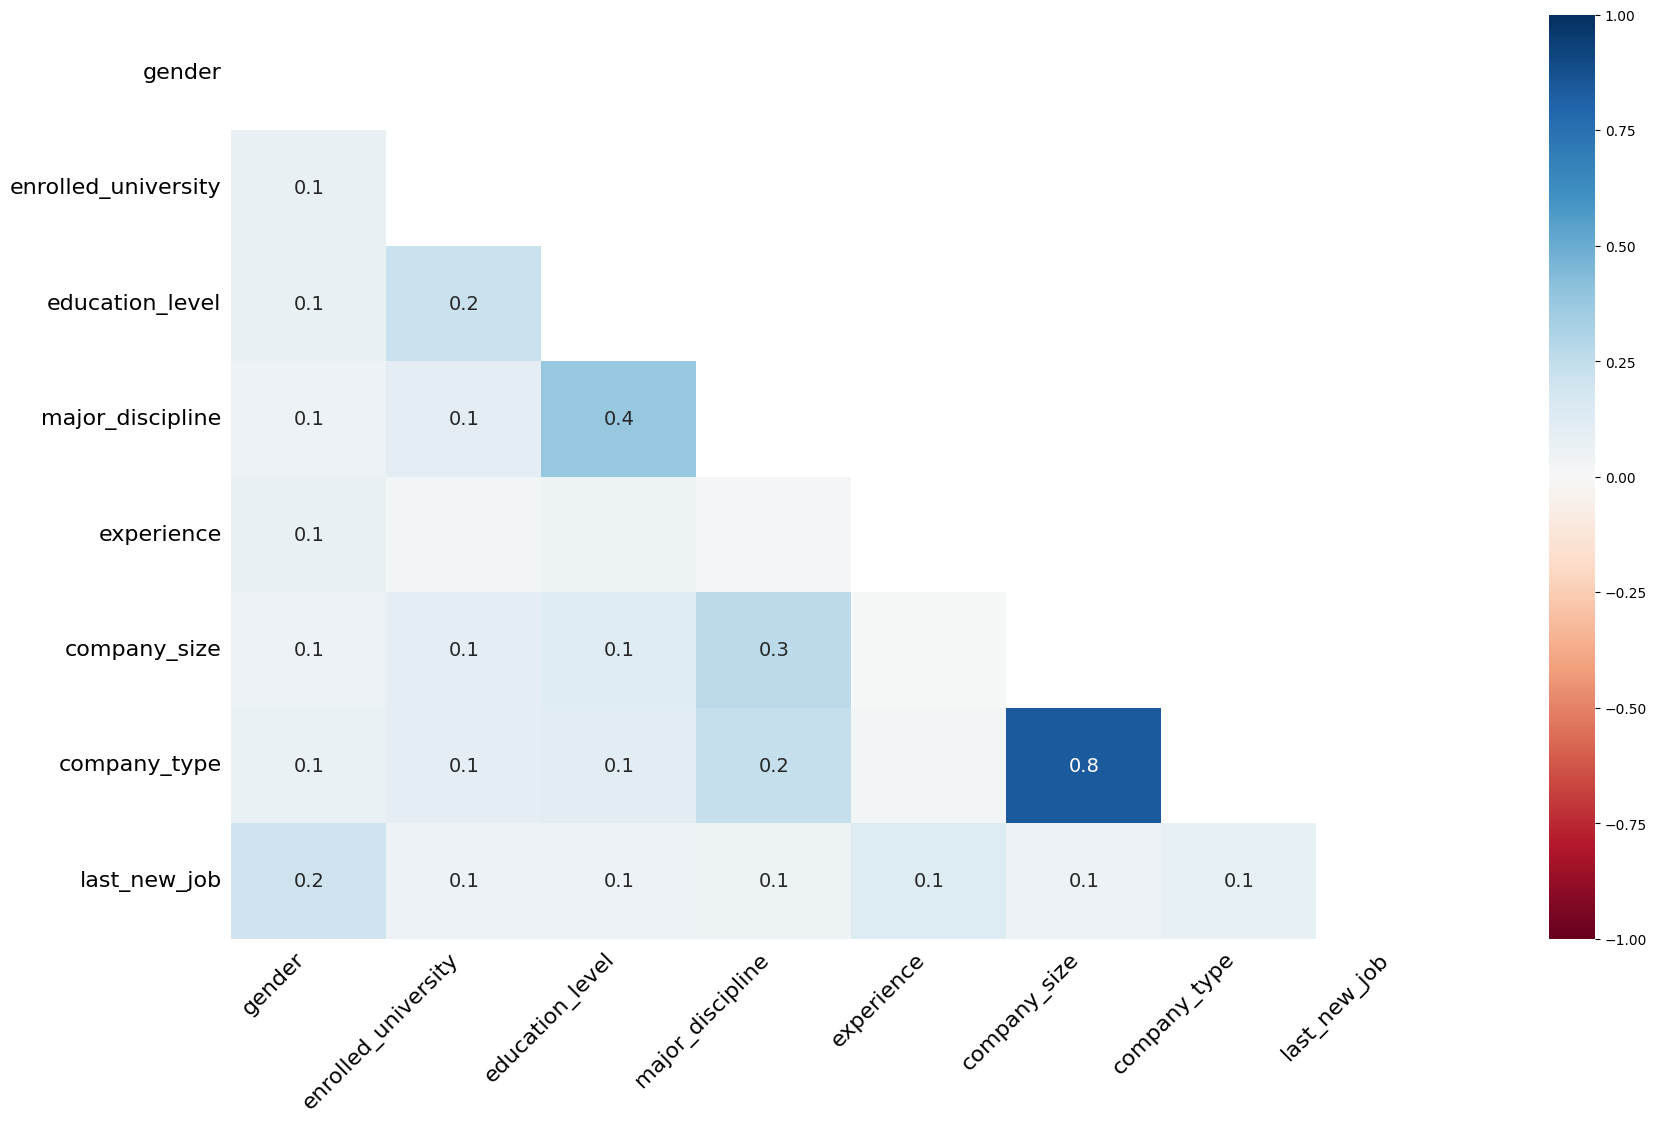

In [ ]:
msno.heatmap(df, labels = True)

*Note*: High correlation between company_size and company_type (if one is missing most likely the other one is missing as well), other correlations are too low and can be ignored.

<Axes: >

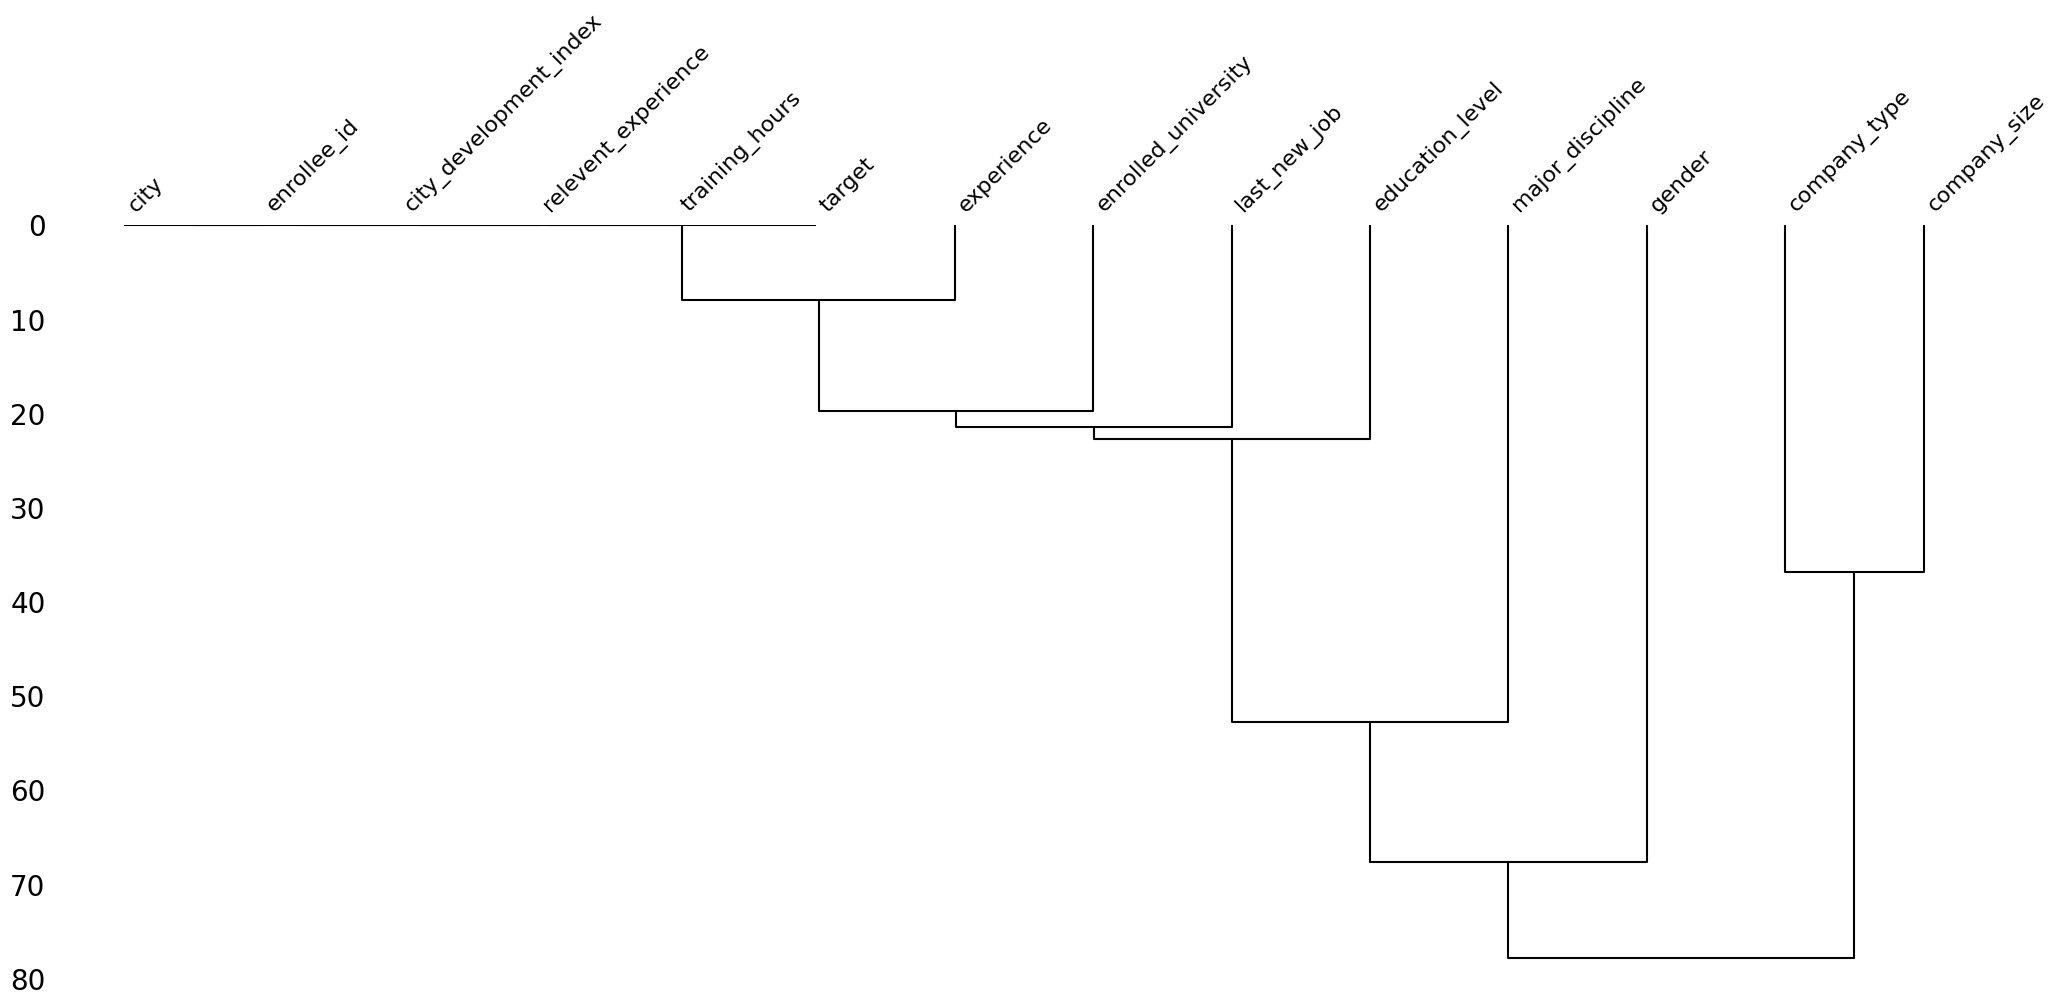

In [ ]:
msno.dendrogram(df)

# **EDA**

In [83]:
# For demonstration/analysis purposes only
df_missing = df.copy();
df_missing = df_missing.fillna('Missing')

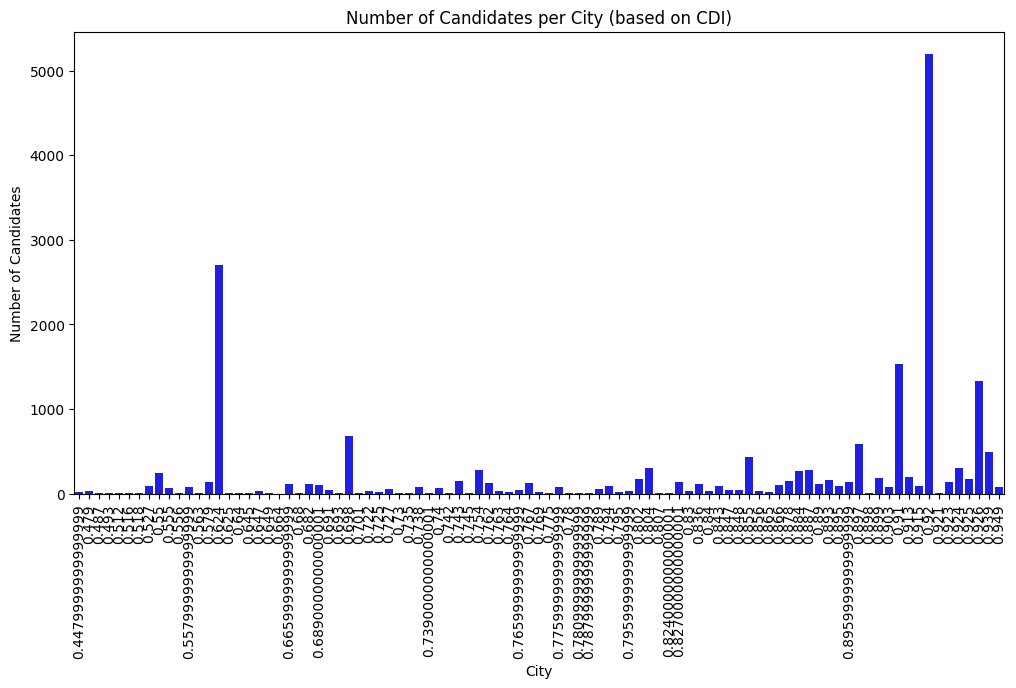

In [113]:
city_counts = df['city_development_index'].value_counts().reset_index()
city_counts.columns = ['city_development_index', 'num_candidates']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='city_development_index', y='num_candidates', data=city_counts, color='blue')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates per City (based on CDI)')
plt.show()

93


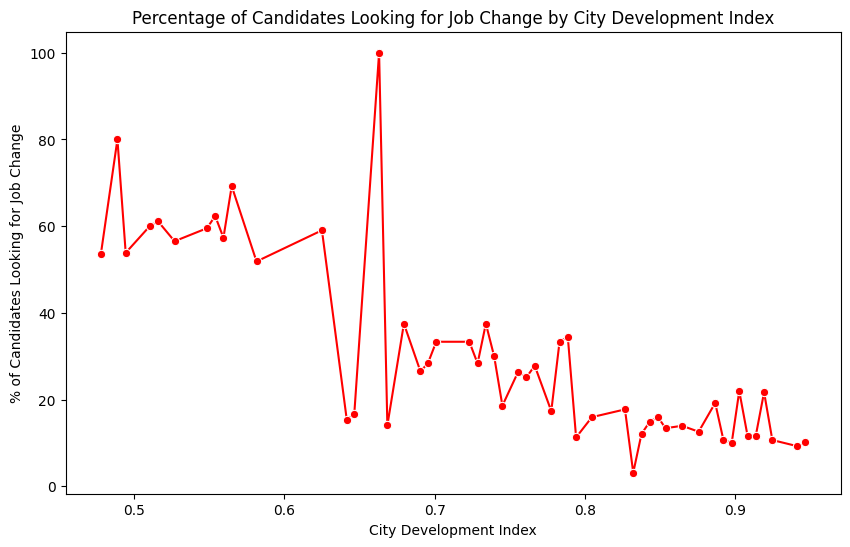

In [110]:
df_new = df.copy()
num_unique_cdi = df['city_development_index'].nunique()

bins = np.linspace(df['city_development_index'].min(), df['city_development_index'].max(), num_unique_cdi)
df_new['cdi_bin'] = pd.cut(df['city_development_index'], bins=bins)

cdi_pct = df_new.groupby('cdi_bin')['target'].mean() * 100
cdi_pct = cdi_pct.reset_index()

cdi_pct['cdi_mid'] = cdi_pct['cdi_bin'].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x='cdi_mid', y='target', data=cdi_pct, marker='o', color='red')
plt.xlabel('City Development Index')
plt.ylabel('% of Candidates Looking for Job Change')
plt.title('Percentage of Candidates Looking for Job Change by City Development Index')
plt.show()

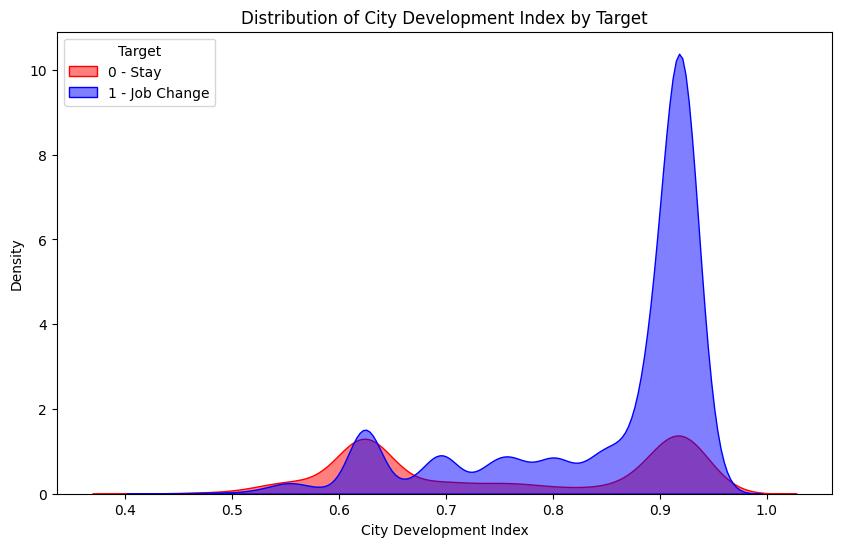

In [100]:
plt.figure(figsize=(10,6))

sns.kdeplot(data=df, x='city_development_index', hue='target', fill=True,
            palette={0: 'blue', 1: 'red'}, alpha=0.5)

plt.xlabel("City Development Index")
plt.ylabel("Density")
plt.title("Distribution of City Development Index by Target")
plt.legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
plt.show()

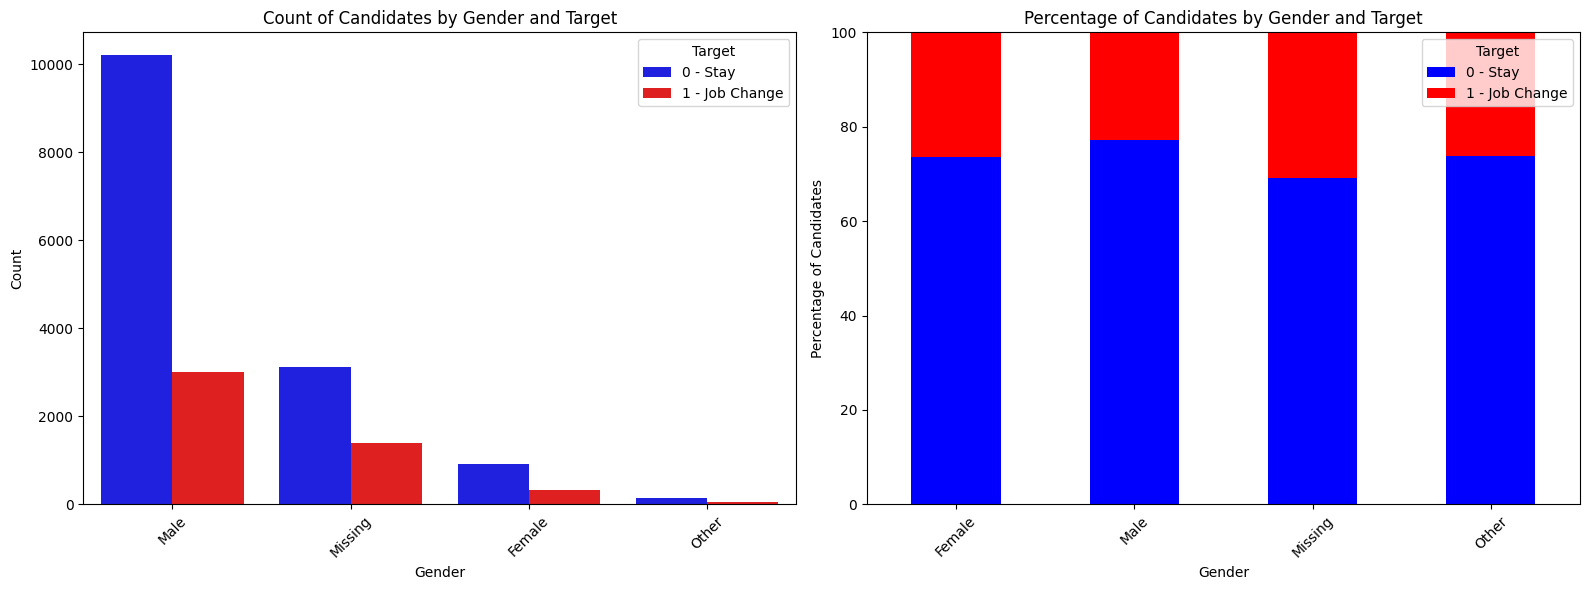

In [97]:
counts = df_missing.groupby(['gender', 'target']).size().unstack(fill_value=0)
pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(x='gender', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Gender and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Gender')
axes[1].set_title('Percentage of Candidates by Gender and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

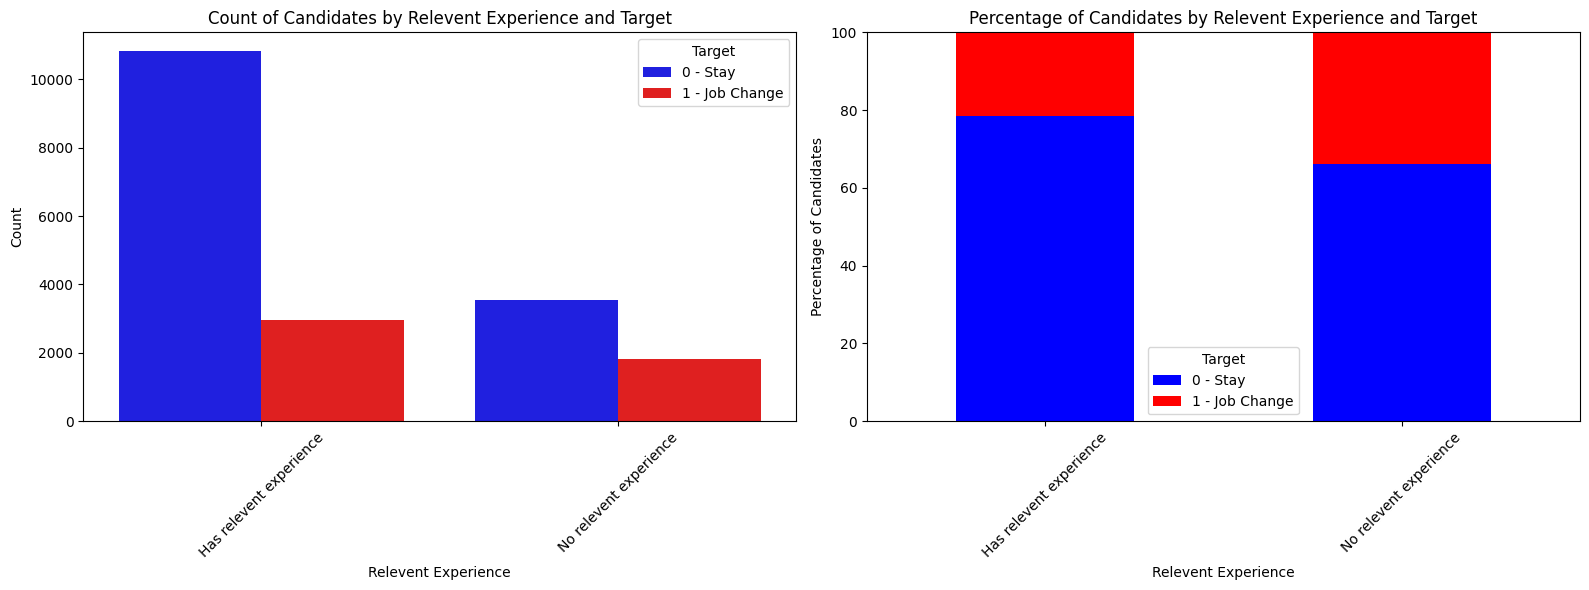

In [114]:
counts = df_missing.groupby(['relevent_experience', 'target']).size().unstack(fill_value=0)
pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(x='relevent_experience', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel("Relevent Experience")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Relevent Experience and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Relevent Experience')
axes[1].set_title('Percentage of Candidates by Relevent Experience and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

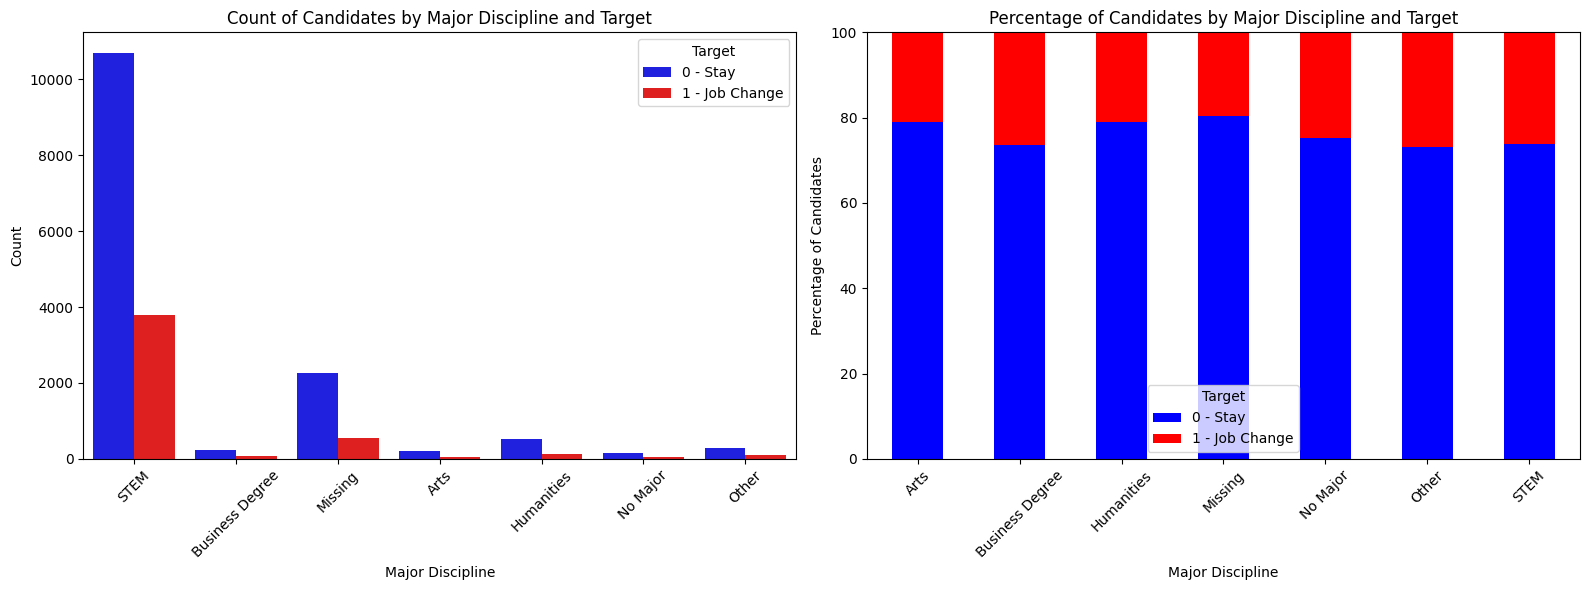

In [98]:
counts = df_missing.groupby(['major_discipline', 'target']).size().unstack(fill_value=0)
pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(x='major_discipline', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel("Major Discipline")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Major Discipline and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Major Discipline')
axes[1].set_title('Percentage of Candidates by Major Discipline and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

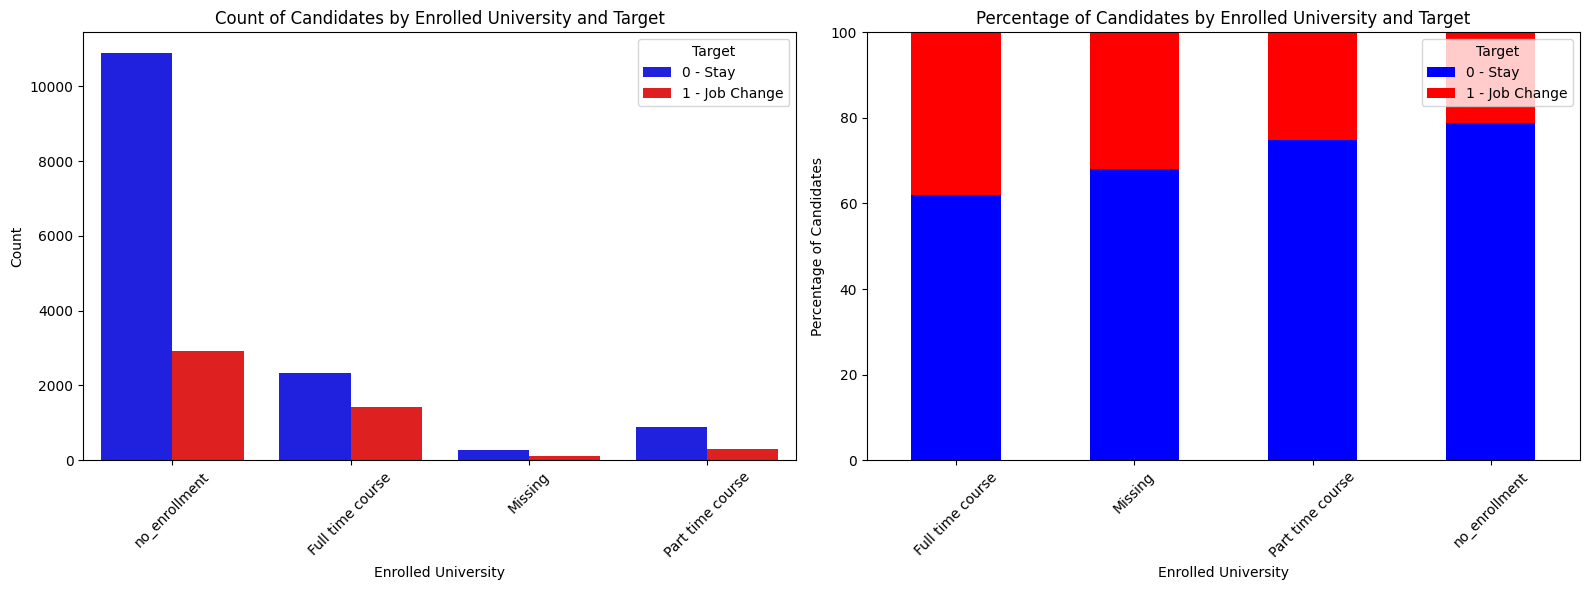

In [115]:
counts = df_missing.groupby(['enrolled_university', 'target']).size().unstack(fill_value=0)
pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(x='enrolled_university', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel("Enrolled University")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Enrolled University and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Enrolled University')
axes[1].set_title('Percentage of Candidates by Enrolled University and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

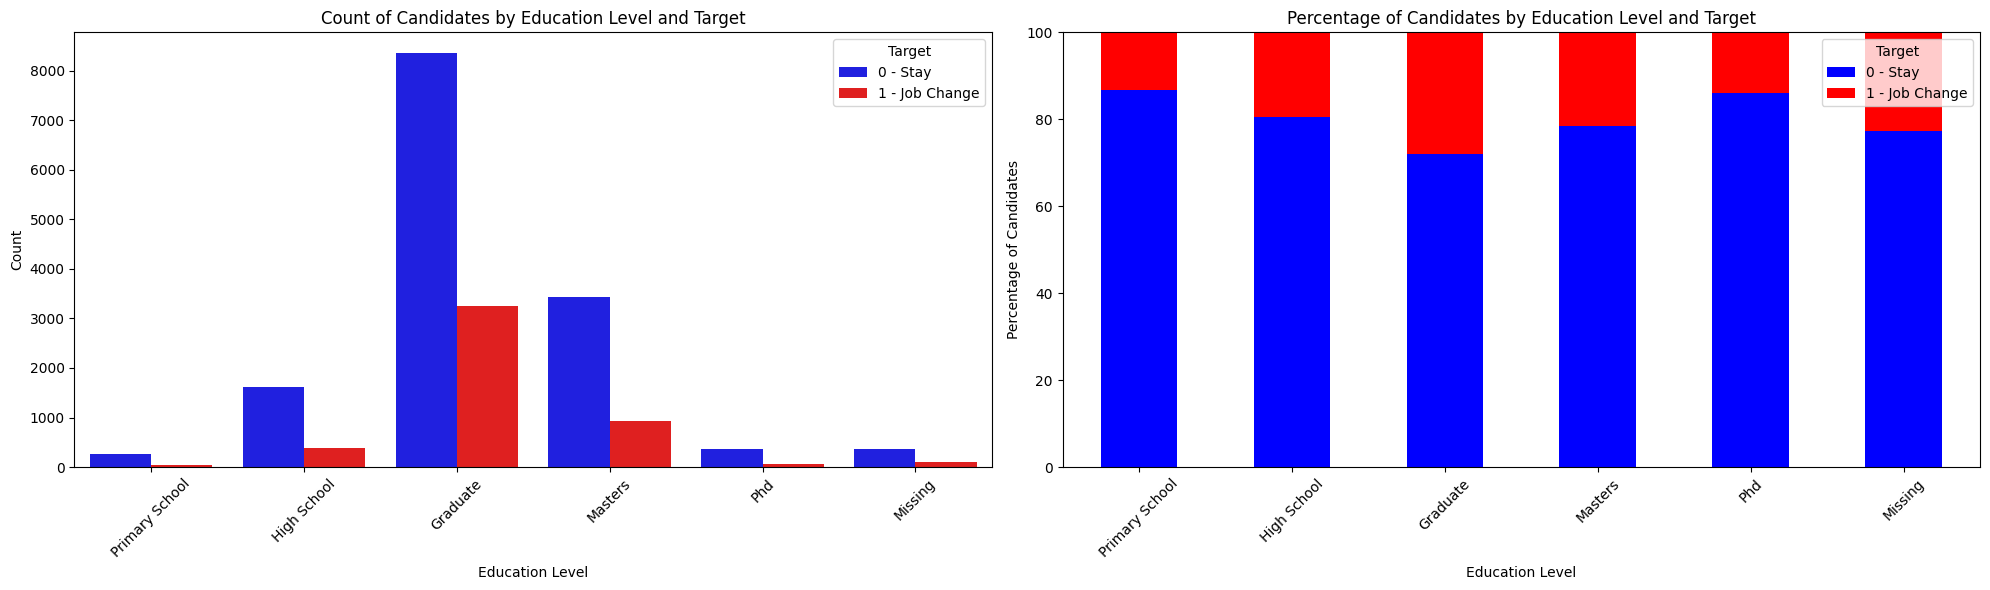

In [122]:
edu_level_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd', 'Missing']

counts = df_missing.groupby(['education_level', 'target']).size().unstack(fill_value=0)

counts = counts.reindex(edu_level_order)

pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='education_level', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, order=edu_level_order, ax=axes[0])
axes[0].set_xlabel("Education Level")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Education Level and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Education Level')
axes[1].set_title('Percentage of Candidates by Education Level and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

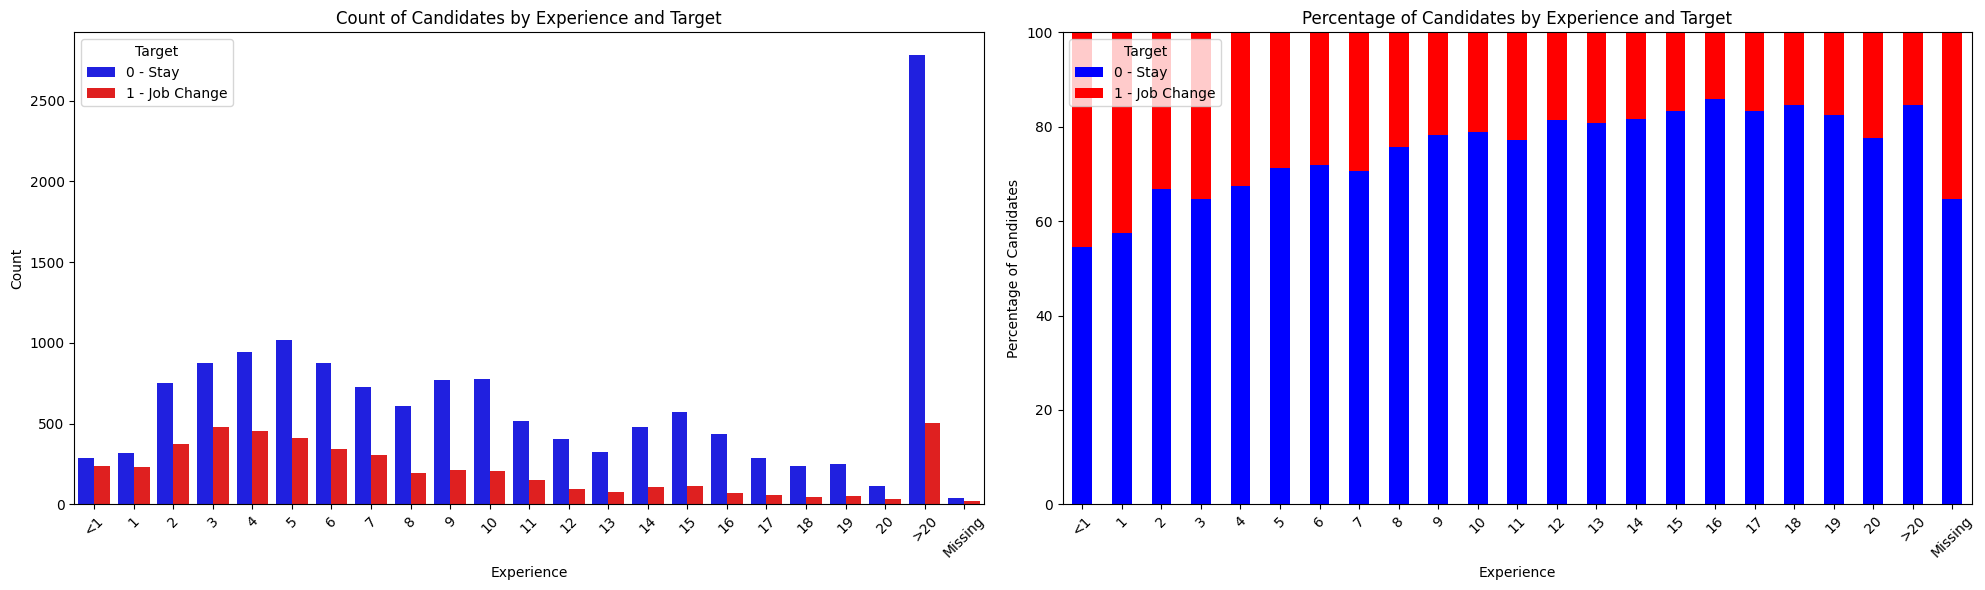

In [123]:
experience_order = ['<1'] + [str(i) for i in range(1, 21)] + ['>20'] + ['Missing']

counts = df_missing.groupby(['experience', 'target']).size().unstack(fill_value=0)

counts = counts.reindex(experience_order)

pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='experience', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, order=experience_order, ax=axes[0])
axes[0].set_xlabel("Experience")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Experience and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Experience')
axes[1].set_title('Percentage of Candidates by Experience and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

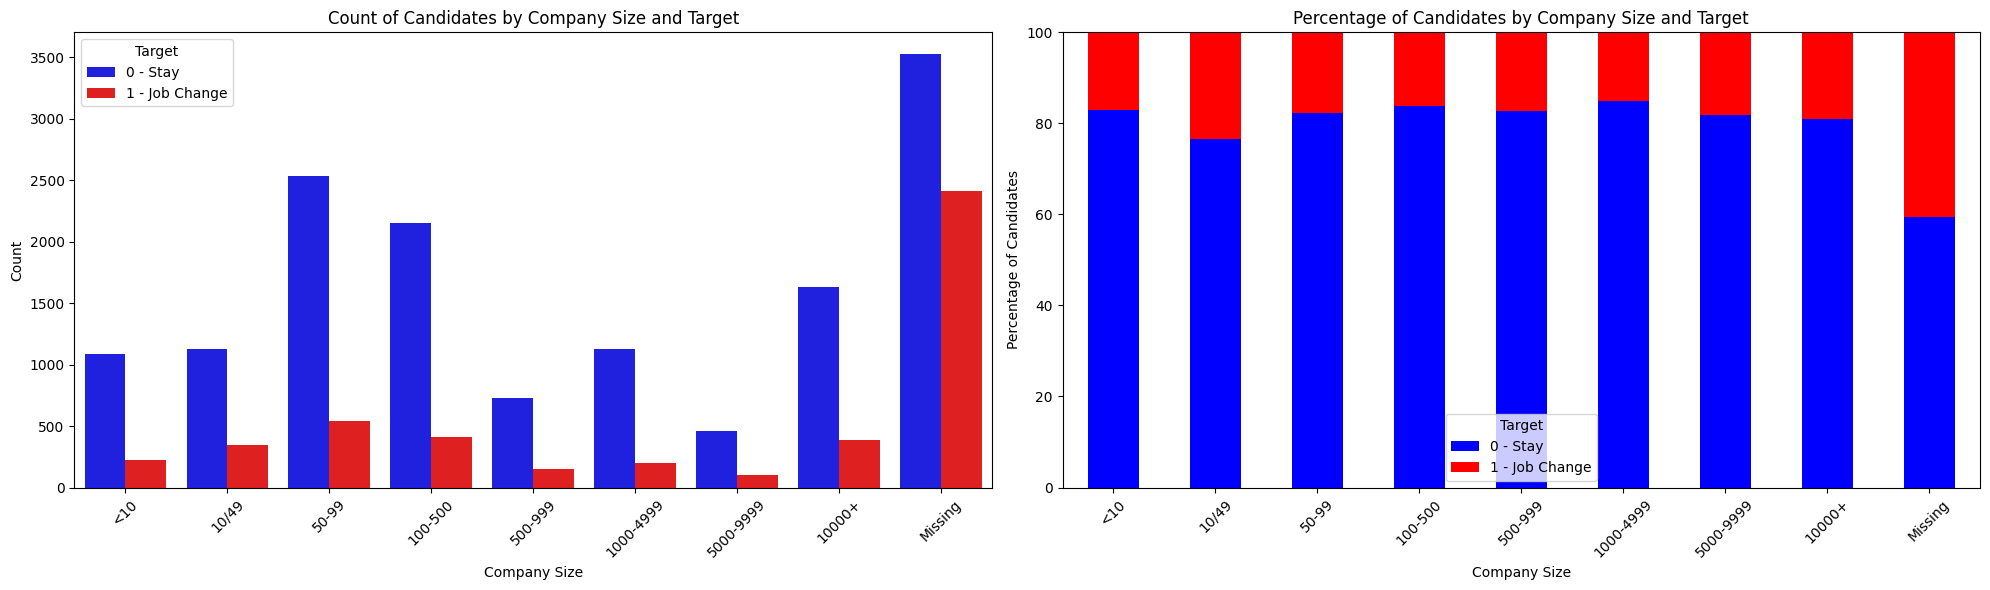

In [124]:
company_size_order = ['<10','10/49','50-99', '100-500', '500-999', '1000-4999','5000-9999', '10000+', 'Missing']

counts = df_missing.groupby(['company_size', 'target']).size().unstack(fill_value=0)

counts = counts.reindex(company_size_order)

pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='company_size', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, order=company_size_order, ax=axes[0])
axes[0].set_xlabel("Company Size")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Company Size and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Company Size')
axes[1].set_title('Percentage of Candidates by Company Size and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

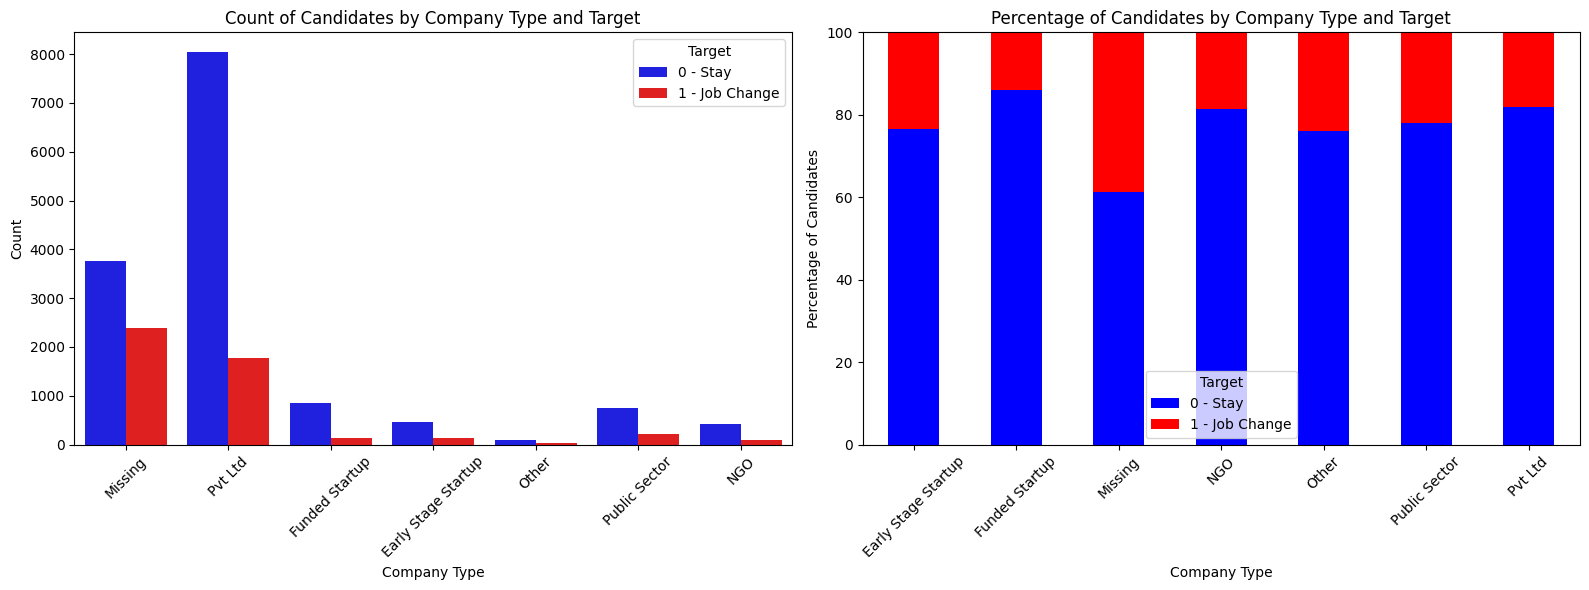

In [126]:
counts = df_missing.groupby(['company_type', 'target']).size().unstack(fill_value=0)
pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(x='company_type', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, ax=axes[0])
axes[0].set_xlabel("Company Type")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Company Type and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Company Type')
axes[1].set_title('Percentage of Candidates by Company Type and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

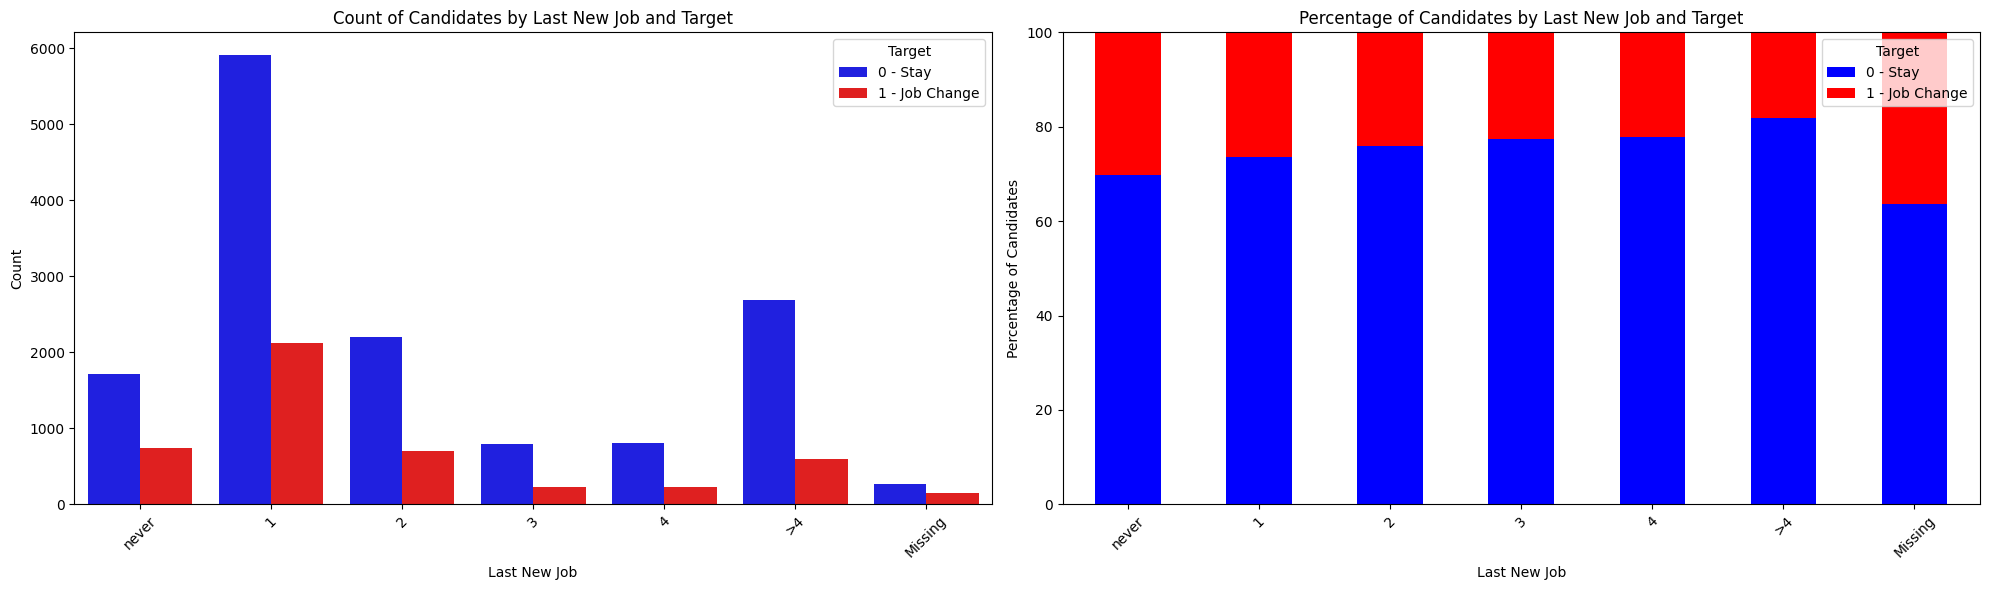

In [130]:
last_new_job_order = ['never','1','2', '3', '4', '>4','Missing']

counts = df_missing.groupby(['last_new_job', 'target']).size().unstack(fill_value=0)

counts = counts.reindex(last_new_job_order)

pct = counts.div(counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(20,6))

sns.countplot(x='last_new_job', hue='target', data=df_missing,
              palette={0: 'blue', 1: 'red'}, order=last_new_job_order, ax=axes[0])
axes[0].set_xlabel("Last New Job")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Candidates by Last New Job and Target")
axes[0].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[0].tick_params(axis='x', rotation=45)

pct.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel('Percentage of Candidates')
axes[1].set_xlabel('Last New Job')
axes[1].set_title('Percentage of Candidates by Last New Job and Target')
axes[1].legend(title='Target', labels=['0 - Stay', '1 - Job Change'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

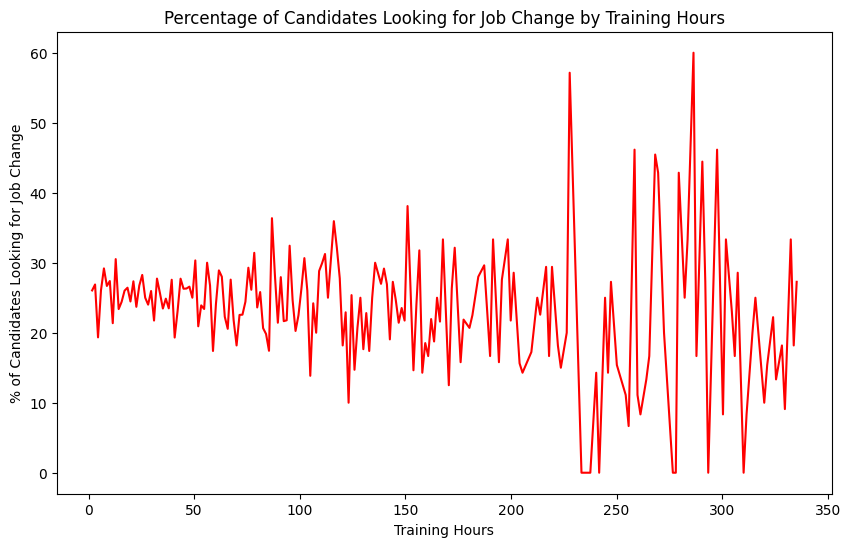

In [132]:
num = df['training_hours'].nunique()

bins = np.linspace(df['training_hours'].min(), df['training_hours'].max(), num)
df_new['th_bin'] = pd.cut(df['training_hours'], bins=bins)

th_pct = df_new.groupby('th_bin')['target'].mean() * 100
th_pct = th_pct.reset_index()

th_pct['th_mid'] = th_pct['th_bin'].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x='th_mid', y='target', data=th_pct, color='red')
plt.xlabel('Training Hours')
plt.ylabel('% of Candidates Looking for Job Change')
plt.title('Percentage of Candidates Looking for Job Change by Training Hours')
plt.show()

# **Numerical summary**

Quick look into how unbalanced the dataset is.

In [5]:
target_counts = df['target'].value_counts()

total_rows = len(df)

target_percent = (target_counts / total_rows * 100).round(2)
print(target_percent)

target
0.0    75.07
1.0    24.93
Name: count, dtype: float64


Data is imbalanced -- 75% of enrollees are not looking for a job change, and only 25% are. This should be handled before training a model using this data, since it may be more sensitive to detecting the majority class, resulting in biased output -- in many cases this means the majority class will be predicted. More on this later (after handling missing data and encoding).

In [6]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [7]:
missing_percent = get_numerical_summary(df)

gender : 4508 (23.531%)
enrolled_university : 386 (2.015%)
education_level : 460 (2.401%)
major_discipline : 2813 (14.683%)
experience : 65 (0.339%)
company_size : 5938 (30.995%)
company_type : 6140 (32.049%)
last_new_job : 423 (2.208%)


In [8]:
missing_counts = df.isnull().sum(axis=1)
for n in range(5, 12):
    count = (missing_counts == n).sum()
    print(f"Rows with {n} missing features: {count}")

rows_6_7_missing = df[(missing_counts == 6) | (missing_counts == 7)]
rows_6_7_missing['target'].value_counts()

Rows with 5 missing features: 176
Rows with 6 missing features: 62
Rows with 7 missing features: 12
Rows with 8 missing features: 0
Rows with 9 missing features: 0
Rows with 10 missing features: 0
Rows with 11 missing features: 0


,count
target,
0.0,58
1.0,16


Company type has the most missing values, followed by company size. Other significent percentages of missingness are gender and major. The rest have fairly low missing %. Still, imputation will be applied to those as well, in order to not disturb the already imbalanced dataset by dropping any features or enrollees.

In [9]:
missing_values_count = df.isnull().sum()

total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

7.730079191087647


Determine if missing values are MCAR, MAR or MNAR

# **Handling Missing Values**

In [18]:
data = df.copy()

In [81]:
data.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [ ]:
unique_dict = {col: data[col].unique() for col in data.columns}

for col, values in unique_dict.items():
    print(f"{col}: {len(values)} unique values -> {values}\n")

enrollee_id: 19158 unique values -> [ 8949 29725 11561 ... 24576  5756 23834]

city: 123 unique values -> ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_

In [19]:
# For demonstration/analysis purposes only
missing_status_df = df.isna().replace({True: 'Missing', False: 'Not Missing'})
missing_status_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing
1,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing
3,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
4,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [11]:
def add_missing_flags(df):

    df = df.copy()

    for col in df.columns:
        if df[col].isna().any():
            df[f"{col}_missing"] = df[col].isna().astype(int)

    return df

Before imputation, missing flags will be added for every feature in order to preserve information about missingness. Analysis done so far, suggests that missingness itself may carry predictive information.

In [20]:
# @title Add missing flags
data = add_missing_flags(data)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,gender_missing,enrolled_university_missing,education_level_missing,major_discipline_missing,experience_missing,company_size_missing,company_type_missing,last_new_job_missing
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,36,1.0,0,0,0,0,0,1,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,47,0.0,0,0,0,0,0,0,0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,83,0.0,1,0,0,0,0,1,1,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,52,1.0,1,1,0,0,0,1,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,8,0.0,0,0,0,0,0,0,0,0


Little's MCAR test will carried to check if data is MCAR.

In [ ]:
# @title MCAR test
%R mcar_test(r_df)

#%R r_dfMissing <- r_df[c("gender", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job")]
#%R mcar_test(r_dfMissing)

,statistic,df,p.value,missing.patterns
1,10757.700275,1065.0,0.0,102


We can conclude that missing data is **not MCAR**.

In [ ]:
# @title Major discipline
contingency = pd.crosstab(df_missing['education_level'], missing_status_df['major_discipline'])
print(contingency)

major_discipline  Missing  Not Missing
education_level                       
Graduate               22        11576
High School          2017            0
Masters                 6         4355
Missing               460            0
Phd                     0          414
Primary School        308            0


Missingness in column major_discipline is highly dependent on values from column education level. For 82.65% of those missing major discipline, their level education is high school or primary school. For education_level=='High school', it'll first be checked if enrollees are enrolled in university or not.

In [22]:
subset = df[(df['major_discipline'].isna()) &
            (df['education_level'] == 'High School')]

distribution = subset['enrolled_university'].value_counts(dropna=False)

print(distribution)

enrolled_university
no_enrollment       940
Full time course    864
Part time course    166
NaN                  47
Name: count, dtype: int64


For those with education level == 'High School' and no enrollment in university, as well for those with Primary School education level, we will impute major_discipline column with 'No Major'. For those enrolled in uni, we will add category "Unknown". Gradute, Masters and Missing (in education_level) will be dealt with later.

In [23]:
df['major_discipline'].value_counts(dropna=False)

,count
major_discipline,
STEM,14492
NaN,2813
Humanities,669
Other,381
Business Degree,327
Arts,253
No Major,223


In [24]:
def impute_major(row):
    if pd.isna(row['major_discipline']):
        if row['education_level'] == 'Primary School':
            return 'No Major'
        elif row['education_level'] == 'High School':
            if row['enrolled_university'] == 'no_enrollment' or pd.isna(row['enrolled_university']):
                return 'No Major'
            else:
                return 'Unknown'
        elif row['education_level'] == 'Masters' or row['education_level'] == 'Graduate':
            return 'Unknown'
    return row['major_discipline']

data['major_discipline'] = data.apply(impute_major, axis=1)

print(data[['education_level', 'enrolled_university', 'major_discipline']].head())

   education_level enrolled_university major_discipline
0         Graduate       no_enrollment             STEM
1         Graduate       no_enrollment             STEM
2         Graduate    Full time course             STEM
3         Graduate                 NaN  Business Degree
4          Masters       no_enrollment             STEM
5         Graduate    Part time course             STEM
6      High School       no_enrollment         No Major
7         Graduate       no_enrollment             STEM
8         Graduate       no_enrollment             STEM
9         Graduate       no_enrollment             STEM
10     High School    Full time course          Unknown
11        Graduate       no_enrollment             STEM
12        Graduate       no_enrollment             STEM
13             NaN                 NaN              NaN
14     High School    Full time course          Unknown
15        Graduate       no_enrollment             STEM
16        Graduate       no_enrollment          

In [25]:
data['major_discipline'].value_counts(dropna=False)

,count
major_discipline,
STEM,14492
No Major,1518
Unknown,1058
Humanities,669
NaN,460
Other,381
Business Degree,327
Arts,253


In [26]:
# @title Gender
df[['gender']].isnull().groupby(df['target']).mean()

,gender
target,
0.0,0.216883
1.0,0.290768


Check if missingness is informative

In [ ]:
df['gender'].value_counts(dropna=False)

,count
gender,
Male,13221
NaN,4508
Female,1238
Other,191


In [ ]:
contingency = pd.crosstab(df_missing['gender'], df['target'])
print(contingency)

target     0.0   1.0
gender              
Female     912   326
Male     10209  3012
Missing   3119  1389
Other      141    50


In order to avoid bias, imputation is done with "Unknown".

In [26]:
data['gender'] = data['gender'].fillna('Unknown')

In [ ]:
data['gender'].value_counts(dropna=False)

,count
gender,
Male,13221
Unknown,4508
Female,1238
Other,191


In [ ]:
# @title Company type and size
contingency = pd.crosstab(missing_status_df['company_size'], missing_status_df['company_type'])
print(contingency)

company_type  Missing  Not Missing
company_size                      
Missing          5360          578
Not Missing       780        12440


Highest % missing

Is this missingness informative? If yes add new category, if not impute with other features.

In [ ]:
df[['company_size', 'company_type']].isnull().groupby(df['target']).mean()

,company_size,company_type
target,,
0.0,0.245324,0.261178
1.0,0.504501,0.499058


It seems as missingness is informative -- about 50% candidates that have missing information about their company (both size and type) are looking for a job change so imputation with "Unknown" will be done for those rows missing both of these features.

For rows missing just size or type, imputation will be done later.

In [27]:
both_missing = df['company_type'].isnull() & df['company_size'].isnull()
data.loc[both_missing, 'company_type'] = 'Unknown'
data.loc[both_missing, 'company_size'] = 'Unknown'

In [ ]:
data['company_type'].value_counts(dropna=False)

,count
company_type,
Pvt Ltd,9817
Unknown,5360
Funded Startup,1001
Public Sector,955
NaN,780
Early Stage Startup,603
NGO,521
Other,121


In [ ]:
data['company_size'].value_counts(dropna=False)

,count
company_size,
Unknown,5360
50-99,3083
100-500,2571
10000+,2019
10/49,1471
1000-4999,1328
<10,1308
500-999,877
NaN,578


In [29]:
# @title Handling the rest of missing data (missing < 5%)
data[['company_size', 'company_type', 'enrolled_university', 'education_level', 'experience', 'last_new_job', 'major_discipline']].isnull().groupby(df['target']).mean()

,company_size,company_type,enrolled_university,education_level,experience,last_new_job,major_discipline
target,,,,,,,
0.0,0.028510,0.044364,0.018288,0.024755,0.002921,0.018705,0.024755
1.0,0.035169,0.029726,0.025748,0.021771,0.004815,0.032238,0.021771


In [31]:
missing_percent = get_numerical_summary(data)

enrolled_university : 386 (2.015%)
education_level : 460 (2.401%)
major_discipline : 460 (2.401%)
experience : 65 (0.339%)
company_size : 578 (3.017%)
company_type : 780 (4.071%)
last_new_job : 423 (2.208%)


In [28]:
missing_values_count = data.isnull().sum()

total_cells = np.prod(data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.7478480387969897


The rest of missing data (less than 5% per feature and 0.75% overall) will be imputed using NaNImputer.

In [30]:
from verstack import NaNImputer

imputer = NaNImputer()

imputer = NaNImputer(train_sample_size = 50000,
                     verbose = False)

data_imputed = imputer.impute(data)

In [31]:
missing_percent = get_numerical_summary(data_imputed)

In [82]:
data_imputed.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,gender_missing,enrolled_university_missing,education_level_missing,major_discipline_missing,experience_missing,company_size_missing,company_type_missing,last_new_job_missing
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,2,STEM,21,-1,...,36,1.0,0,0,0,0,0,1,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,2,STEM,15,2,...,47,0.0,0,0,0,0,0,0,0,0
2,11561,city_21,0.624,Unknown,No relevent experience,Full time course,2,STEM,5,-1,...,83,0.0,1,0,0,0,0,1,1,0
3,33241,city_115,0.789,Unknown,No relevent experience,Full time course,2,Business Degree,0,-1,...,52,1.0,1,1,0,0,0,1,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,3,STEM,21,2,...,8,0.0,0,0,0,0,0,0,0,0


In [33]:
missing_values_count = data_imputed.isnull().sum()

total_cells = np.prod(data_imputed.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


# **Handle Categorical Data**

In [ ]:
df.dtypes

,0
enrollee_id,int64
city,object
city_development_index,float64
gender,object
relevent_experience,object
enrolled_university,object
education_level,object
major_discipline,object
experience,object
company_size,object


In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
Numerical columns: ['enrollee_id', 'city_development_index', 'training_hours', 'target']


*Ordinal*: education_level, experience, company_size, last_new_job

*Nominal*: relevent_experience, city, gender, major_discipline, company_type, enrolled_university

*Numerical*: city_development_index, training_hours

Ordinal Data: Label Encoding, mapping

In [ ]:
unique_dict = {col: data_imputed[col].unique() for col in data_imputed.columns if data_imputed[col].dtype == 'object'}

for col, values in unique_dict.items():
    print(f"{col}: {len(values)} unique values -> {values}\n")

city: 123 unique values -> [np.str_('city_103') np.str_('city_40') np.str_('city_21')
 np.str_('city_115') np.str_('city_162') np.str_('city_176')
 np.str_('city_160') np.str_('city_46') np.str_('city_61')
 np.str_('city_114') np.str_('city_13') np.str_('city_159')
 np.str_('city_102') np.str_('city_67') np.str_('city_100')
 np.str_('city_16') np.str_('city_71') np.str_('city_104')
 np.str_('city_64') np.str_('city_101') np.str_('city_83')
 np.str_('city_105') np.str_('city_73') np.str_('city_75')
 np.str_('city_41') np.str_('city_11') np.str_('city_93')
 np.str_('city_90') np.str_('city_36') np.str_('city_20')
 np.str_('city_57') np.str_('city_152') np.str_('city_19')
 np.str_('city_65') np.str_('city_74') np.str_('city_173')
 np.str_('city_136') np.str_('city_98') np.str_('city_97')
 np.str_('city_50') np.str_('city_138') np.str_('city_82')
 np.str_('city_157') np.str_('city_89') np.str_('city_150')
 np.str_('city_70') np.str_('city_175') np.str_('city_94')
 np.str_('city_28') np.str

In [34]:
def OrdMapping(df):

    education_level_ord_mapping = {'Primary School': 0,'High School': 1,'Graduate': 2 , 'Masters':3,'Phd': 4 }
    experience_ord_mapping= {'<1':0, '1':1, '2':2, '3':3,'4':4, '5':5, '6':6, '7':7, '8':8,'9':9, '10':10, '11':10, '12':12, '13':13,'14':14, '15':15, '16':16,  '17':17,'18':18, '19':19,'20':20,'>20':21}
    company_size_ord_mapping = {'Unknown':-1, '<10':0 ,'10/49':1,'50-99':2, '100-500':3, '500-999':4, '1000-4999':5,'5000-9999':6, '10000+':7}
    last_new_job_ord_mapping = {'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}

    df['education_level'] = df.education_level.map(education_level_ord_mapping)
    df['experience'] = df.experience.map(experience_ord_mapping)
    df['company_size'] = df.company_size.map(company_size_ord_mapping)
    df['last_new_job'] = df.last_new_job.map(last_new_job_ord_mapping)

    return df

In [35]:
data_imputed_mapped = OrdMapping(data_imputed)

In [36]:
missing_values_count = data_imputed_mapped.isnull().sum()

total_cells = np.prod(data_imputed_mapped.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [37]:
missing_percent = get_numerical_summary(data_imputed_mapped)

In [38]:
data_imputed_mapped.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,gender_missing,enrolled_university_missing,education_level_missing,major_discipline_missing,experience_missing,company_size_missing,company_type_missing,last_new_job_missing
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,2,STEM,21,-1,...,36,1.0,0,0,0,0,0,1,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,2,STEM,15,2,...,47,0.0,0,0,0,0,0,0,0,0
2,11561,city_21,0.624,Unknown,No relevent experience,Full time course,2,STEM,5,-1,...,83,0.0,1,0,0,0,0,1,1,0
3,33241,city_115,0.789,Unknown,No relevent experience,Full time course,2,Business Degree,0,-1,...,52,1.0,1,1,0,0,0,1,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,3,STEM,21,2,...,8,0.0,0,0,0,0,0,0,0,0


Nominal Data: Target Encoding

In [77]:
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

X = data_imputed_mapped[['relevent_experience', 'city', 'gender', 'major_discipline', 'company_type', 'enrolled_university']]
y = data_imputed_mapped['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = TargetEncoder(cv=5, smooth='auto')
encoder.fit(X_train, y_train)

X_encoded_full = encoder.transform(X)

X_encoded_full = pd.DataFrame(X_encoded_full, columns=X.columns, index=X.index)

data_imputed_mapped_encoded = data_imputed_mapped.copy()
data_imputed_mapped_encoded[X.columns] = X_encoded_full

In [78]:
data_imputed_mapped_encoded.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,gender_missing,enrolled_university_missing,education_level_missing,major_discipline_missing,experience_missing,company_size_missing,company_type_missing,last_new_job_missing
0,8949,0.202291,0.920,0.226105,0.214274,0.211155,2,0.262302,21,-1,...,36,1.0,0,0,0,0,0,1,1,0
1,29725,0.164516,0.776,0.226105,0.336068,0.211155,2,0.262302,15,2,...,47,0.0,0,0,0,0,0,0,0,0
2,11561,0.598686,0.624,0.310657,0.336068,0.382269,2,0.262302,5,-1,...,83,0.0,1,0,0,0,0,1,1,0
3,33241,0.410786,0.789,0.310657,0.336068,0.382269,2,0.254212,0,-1,...,52,1.0,1,1,0,0,0,1,0,0
4,666,0.265763,0.767,0.226105,0.214274,0.211155,3,0.262302,21,2,...,8,0.0,0,0,0,0,0,0,0,0
5,21651,0.345911,0.764,0.310657,0.214274,0.247608,2,0.262302,10,-1,...,24,1.0,1,0,0,0,0,1,1,0
6,28806,0.255919,0.920,0.226105,0.214274,0.211155,1,0.155794,5,2,...,24,0.0,0,0,0,1,0,0,0,0
7,402,0.244232,0.762,0.226105,0.214274,0.211155,2,0.262302,13,0,...,18,1.0,0,0,0,0,0,0,0,0
8,27107,0.202291,0.920,0.226105,0.214274,0.211155,2,0.262302,7,2,...,46,1.0,0,0,0,0,0,0,0,0
9,699,0.202291,0.920,0.310657,0.214274,0.211155,2,0.262302,17,7,...,123,0.0,1,0,0,0,0,0,0,0


# **Handling Unbalanced Dataset**

*Idea*: Oversampling + K-Fold CV

In progress...

In [64]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, recall_score

In [69]:
smote= SMOTE(sampling_strategy='minority', k_neighbors=5)

tml = TomekLinks()

In [79]:
score_auc = []
score_recall = []

train = data_imputed_mapped_encoded
target = train.pop('target')

oof_rf = np.zeros(len(train))
#pred_rf = np.zeros(len(test))

folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [80]:
for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target)):
    print('fold:', fold_, '  - Starting ...')
    trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind]
    y_train, y_val = target.iloc[train_ind], target.iloc[val_ind]

    train_upsample, y_upsample = smote.fit_resample(trn_data, y_train)
    rf = RandomForestClassifier(n_estimators=150, max_depth=5, criterion='gini', max_features=0.8, min_samples_split=5, n_jobs= -1, random_state=32)
    rf.fit(train_upsample, y_upsample)

    oof_rf[val_ind] = rf.predict_proba(val_data)[:, 1]

    y = rf.predict_proba(train_upsample)[:, 1]

    print('val auc:' , roc_auc_score(y_val, oof_rf[val_ind]))
    print('val recall:' , recall_score(y_val, np.where(oof_rf[val_ind] > 0.5, 1, 0)))

    score_auc.append(roc_auc_score(y_val, oof_rf[val_ind]))
    score_recall.append(recall_score(y_val, np.where(oof_rf[val_ind] > 0.5, 1, 0)))


    #pred_rf += rf.predict_proba(test)[:, 1]/folds.n_splits

print(' Model auc: -------> ', np.mean(score_auc))
print(' Model recall: -------> ', np.mean(score_recall))

fold: 0   - Starting ...
val auc: 0.777502980094764
val recall: 0.7161572052401747
fold: 1   - Starting ...
val auc: 0.7796703906797179
val recall: 0.6963562753036437
fold: 2   - Starting ...
val auc: 0.7570273455247614
val recall: 0.657258064516129
fold: 3   - Starting ...
val auc: 0.7927196327683615
val recall: 0.698
fold: 4   - Starting ...
val auc: 0.7993653057842905
val recall: 0.7422680412371134
fold: 5   - Starting ...
val auc: 0.8001136957347773
val recall: 0.7306034482758621
fold: 6   - Starting ...
val auc: 0.7823294649973159
val recall: 0.6993464052287581
fold: 7   - Starting ...
val auc: 0.7990148326097019
val recall: 0.7346072186836518
fold: 8   - Starting ...
val auc: 0.7965760233918129
val recall: 0.7305263157894737
fold: 9   - Starting ...
val auc: 0.7886747076023392
val recall: 0.6863157894736842
 Model auc: ------->  0.7872994379187842
 Model recall: ------->  0.7091438763748491


In [45]:
X_over, y_over = smote.fit_resample(train, target)

data_oversamp = X_over.copy()
data_oversamp['target'] = y_over

In [46]:
print("Shape:", data_oversamp.shape)

target_counts = data_oversamp['target'].value_counts()
target_percent = data_oversamp['target'].value_counts(normalize=True) * 100

print("\nCount:")
print(target_counts)

print("\nPercentage:")
print(target_percent)

Shape: (28762, 22)

Count:
target
1.0    14381
0.0    14381
Name: count, dtype: int64

Percentage:
target
1.0    50.0
0.0    50.0
Name: proportion, dtype: float64


# MODEL

In progress...

Logistic Regression

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = data_oversamp['target']

X = data_oversamp.drop(columns=['target', 'enrollee_id'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8077524769685381

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      2877
         1.0       0.81      0.80      0.81      2876

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753


Confusion Matrix:
 [[2338  539]
 [ 567 2309]]


In [56]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "aug_test.csv"

df_test = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arashnic/hr-analytics-job-change-of-data-scientists",
  file_path
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'hr-analytics-job-change-of-data-scientists' dataset.
First 5 records:    enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN 

In [57]:
missing_percent = get_numerical_summary(df_test)

gender : 508 (23.861%)
enrolled_university : 31 (1.456%)
education_level : 52 (2.442%)
major_discipline : 312 (14.655%)
experience : 5 (0.235%)
company_size : 622 (29.216%)
company_type : 634 (29.779%)
last_new_job : 40 (1.879%)


In [58]:
data_test = add_missing_flags(df_test)
data_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,last_new_job,training_hours,gender_missing,enrolled_university_missing,education_level_missing,major_discipline_missing,experience_missing,company_size_missing,company_type_missing,last_new_job_missing
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,...,1,21,0,0,0,0,0,0,1,0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,...,1,98,0,0,0,0,0,1,0,0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,...,never,15,0,0,0,1,0,1,0,0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,...,1,39,0,0,0,0,0,0,0,0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,...,>4,72,0,0,0,0,0,0,0,0


In [59]:
from verstack import NaNImputer

imputer = NaNImputer()

imputer = NaNImputer(train_sample_size = 50000,
                     verbose = False)

data_test = imputer.impute(data_test)

In [60]:
data_test = OrdMapping(data_test)

In [61]:
X_test_raw = data_test[['relevent_experience', 'city', 'gender',
                        'major_discipline', 'company_type', 'enrolled_university']]

X_test_encoded = encoder.transform(X_test_raw)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test_raw.columns, index=X_test_raw.index)
data_test_encoded = data_test.copy()
data_test_encoded[X_test_raw.columns] = X_test_encoded

In [62]:
test_ids = data_test_encoded["enrollee_id"]

X_test_final = data_test_encoded.drop(columns=["enrollee_id"])

X_test_final_scaled = scaler.transform(X_test_final)

test_predictions = model.predict(X_test_final_scaled)

results = pd.DataFrame({
    "enrollee_id": test_ids,
    "predicted_target": test_predictions
})

print(results.head())


   enrollee_id  predicted_target
0        32403               0.0
1         9858               1.0
2        31806               1.0
3        27385               0.0
4        27724               0.0


In [63]:
results.to_csv("test_results.csv", index=False)